In [1]:
# Titanic_Notebook.ipynb

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import joblib
import matplotlib.pyplot as plt


In [2]:
# --- Load dataset ---
df = pd.read_csv("TitanicDataset.csv", encoding="utf-8")
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

y = df['Survived']
X = df.drop('Survived', axis=1)



In [3]:
# --- Preprocessing ---
cat_cols = [c for c in X.columns if X[c].dtype == 'object' or X[c].nunique() < 10]
num_cols = [c for c in X.columns if X[c].dtype in ['int64','float64'] and c not in cat_cols]

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

In [4]:
# --- Model ---
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=250, max_depth=12, random_state=42))
])

model.fit(X, y)

# --- Save model ---
joblib.dump((model, list(X.columns)), "titanic_model.pkl")


['titanic_model.pkl']

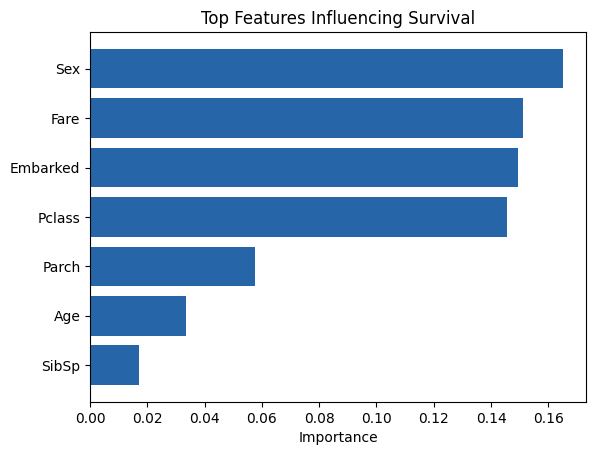

In [5]:

# --- Feature importance visualization ---
importances = model.named_steps['classifier'].feature_importances_
fi_sorted = sorted(
    [(feat, val) for feat, val in zip(X.columns, importances) if feat.lower() != "passengerid"],
    key=lambda x: -x[1]
)

fi_features, fi_vals = zip(*fi_sorted[:7])
plt.barh(fi_features, fi_vals, color="#2665a7")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top Features Influencing Survival")
plt.show()